In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv(r"C:\Users\nikit\Pycharm\No_Reference\valid_niqe_results.csv")

In [9]:
df.head()

,Image_Path,NIQE_score
0,D:\iNaturalist\images\Bellis_perennis_0.jpg,6.045126
1,D:\iNaturalist\images\Bellis_perennis_1.JPG,3.410430
2,D:\iNaturalist\images\Bellis_perennis_10.JPG,2.502014
3,D:\iNaturalist\images\Bellis_perennis_100.jpg,3.838044
4,D:\iNaturalist\images\Bellis_perennis_1000.jpg,2.976666


In [10]:
df.describe()

,NIQE_score
count,51253.000000
mean,4.082252
std,1.005623
min,1.812825
25%,3.406444
50%,3.938671
75%,4.577956
max,40.952171


In [11]:
df.loc[df['NIQE_score'] == 40.95217141203016]

,Image_Path,NIQE_score
30159,D:\iNaturalist\images\Bellis_perennis_67036.jpg,40.952171


In [12]:
df.loc[df['NIQE_score'] == 1.8128246073188832]

,Image_Path,NIQE_score
45573,D:\iNaturalist\images\Leucanthemum_vulgare_892...,1.812825


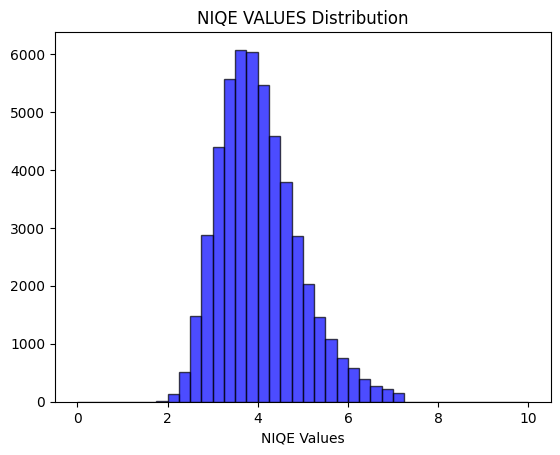

In [26]:
# Create a histogram with density and custom color
plt.hist(df['NIQE_score'],bins = 40, color = 'blue', edgecolor='black', alpha=0.7, range=(0,10))
plt.xlabel('NIQE Values')
plt.title('NIQE Values Distribution')
plt.show()

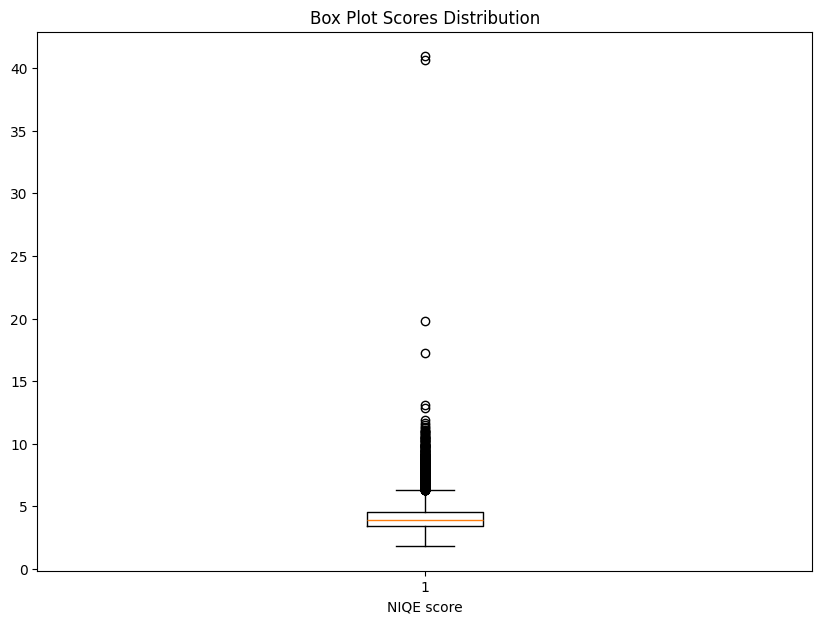

In [14]:
fig = plt.figure(figsize=(10,7))
plt.boxplot(df['NIQE_score'])
plt.xlabel('NIQE score')
plt.title('Box Plot Scores Distribution')
plt.show()

In [15]:
 df.loc[df['NIQE_score'] > 15]

,Image_Path,NIQE_score
15631,D:\iNaturalist\images\Bellis_perennis_38766.jpg,40.612504
30159,D:\iNaturalist\images\Bellis_perennis_67036.jpg,40.952171
34014,D:\iNaturalist\images\Bellis_perennis_74444.jpg,17.237936
49925,D:\iNaturalist\images\Leucanthemum_vulgare_998...,19.818337


In [16]:
q = df["NIQE_score"].quantile(0.99)

In [17]:
df = df[df["NIQE_score"] < q]

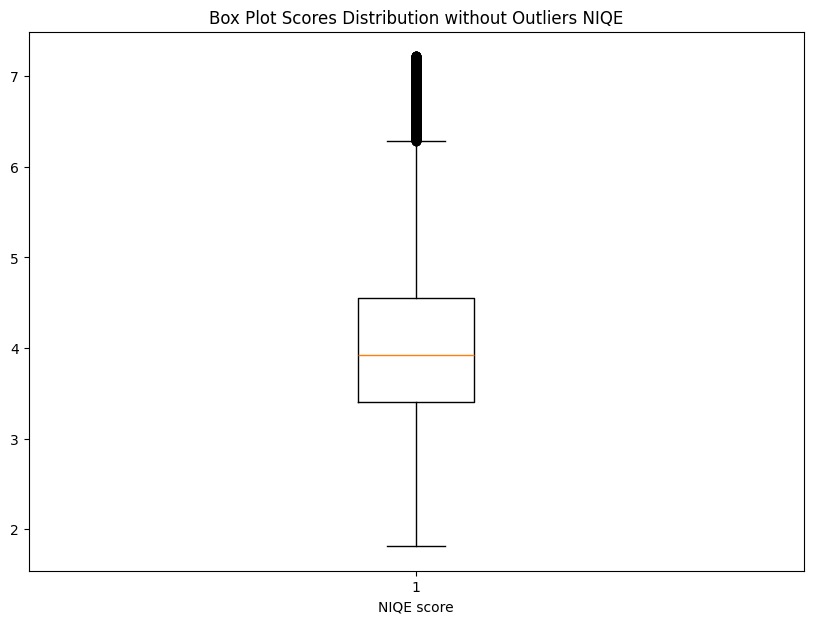

In [18]:
fig = plt.figure(figsize=(10,7))
plt.boxplot(df['NIQE_score'])
plt.xlabel('NIQE score')
plt.title('Box Plot Scores Distribution without Outliers NIQE')
plt.show()

## Seting up the threshold

Based on NIQE original paper:
NIQE < 3: Excellent
NIQE 3 - 5: Acceptable
NIQE > 5 - 6: Questionable/Bad
Based on my Box Plot Upper Whisker is about 6 - 6,5, then images above upper whisker are likely to be 'bad' and can be excluded


In [19]:
Q1 = df["NIQE_score"].quantile(0.25)
Q3 = df["NIQE_score"].quantile(0.75)
IQR = Q3 - Q1
upper_whisker = Q3 + 1.5 * IQR
df_good_images = df[df['NIQE_score'] <= upper_whisker]
df_bad_images = df[df['NIQE_score'] > upper_whisker]


In [20]:
df_bad_images.head()

,Image_Path,NIQE_score
18,D:\iNaturalist\images\Bellis_perennis_10022.jpg,6.323120
86,D:\iNaturalist\images\Bellis_perennis_10131.jpg,6.419077
220,D:\iNaturalist\images\Bellis_perennis_10353.jpg,6.480909
244,D:\iNaturalist\images\Bellis_perennis_10388.jpg,6.731666
359,D:\iNaturalist\images\Bellis_perennis_106.jpg,6.938601


## Normalization

Rescale the score with min-max normalization so the minimum becomes 0 and the maximum becomes 1. After that invert the results so the 1 represents best looking images and the 0 represents worse looking images.

In [21]:
min_val = df_good_images['NIQE_score'].min()
max_val = df_good_images['NIQE_score'].max()

df_good_images.loc[:,'NIQE_score_norm'] = (df_good_images.loc[:,'NIQE_score'] - min_val) / (max_val - min_val)

C:\Users\nikit\AppData\Local\Temp\ipykernel_21072\250651089.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_images.loc[:,'NIQE_score_norm'] = (df_good_images.loc[:,'NIQE_score'] - min_val) / (max_val - min_val)


In [22]:
df_good_images.head()

,Image_Path,NIQE_score,NIQE_score_norm
0,D:\iNaturalist\images\Bellis_perennis_0.jpg,6.045126,0.945827
1,D:\iNaturalist\images\Bellis_perennis_1.JPG,3.410430,0.357030
2,D:\iNaturalist\images\Bellis_perennis_10.JPG,2.502014,0.154019
3,D:\iNaturalist\images\Bellis_perennis_100.jpg,3.838044,0.452593
4,D:\iNaturalist\images\Bellis_perennis_1000.jpg,2.976666,0.260093


In [23]:
df_good_images.loc[:,'NIQE_score_norm'] = 1 - df_good_images.loc[:,'NIQE_score_norm']

In [24]:
df_good_images.head()

,Image_Path,NIQE_score,NIQE_score_norm
0,D:\iNaturalist\images\Bellis_perennis_0.jpg,6.045126,0.054173
1,D:\iNaturalist\images\Bellis_perennis_1.JPG,3.410430,0.642970
2,D:\iNaturalist\images\Bellis_perennis_10.JPG,2.502014,0.845981
3,D:\iNaturalist\images\Bellis_perennis_100.jpg,3.838044,0.547407
4,D:\iNaturalist\images\Bellis_perennis_1000.jpg,2.976666,0.739907


In [25]:
df_good_images.shape

(49774, 3)